### 6.1.2 확률적 경사 하강법(SGD)
<br>
latex:
https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd
<br><br>


$$W\leftarrow W - \eta \frac{\partial L}{\partial W}$$

In [1]:
class SGD:
    def __init__(self, lr=0.01):#학습률 초기화
        self.lr = lr
    
    def update(self, params, grads):#갱신(반복해서 불러옴)
        for key in (self,params,grads):
            params[key] -= self.lr * grads[key]

In [43]:
class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


### 6.1.4 모멘텀 Momentum (SGD 대체제 #1)

$$ v \leftarrow \alpha v - \eta \frac{\partial L}{\partial W}$$
$$ W \leftarrow W+v $$

In [2]:
import numpy as np
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr#학습률
        self.momentum = momentum
        self.v = None#속도
    
    def update(self, params, grads):#갱신
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key]-sef.lr*grads[key]#v <- alpha * v - lr*grads
            params[key]+=self.v[key]

### 6.1.5 AdaGrad (SGD 대체제 #2)
$$ h \leftarrow h+ \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} $$

$$ W \leftarrow W- \eta \frac{1}{\sqrt{h}}\frac{\partial L}{\partial W} $$

In [3]:
class AdaGrad:#학습률 감소가 매개변수 원소마다 다르게 적용됨
    def __init__(self,lr=0.01):
        self.lr = lr#학습률
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]#h갱신
            params[key]-= self.lr*grads[key]/(np.sqrt(self.j[key])+1e-7)

### 6.1.6 Adam (SGD 대체제 #3)
모멘텀과 AdaGrad를 융합

### 6.2.2 은닉층의 활성화 값 분포
가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x = np.random.randn(1000,100)#입력데이터 1000개
node_num = 100#각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5#은닉층이 5개
activations = {}#이곳에 활성화 결과(활성화 값)를 저장

for i in range(hidden_layer_size):
    if i!= 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num,node_num)*1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i]=z
    

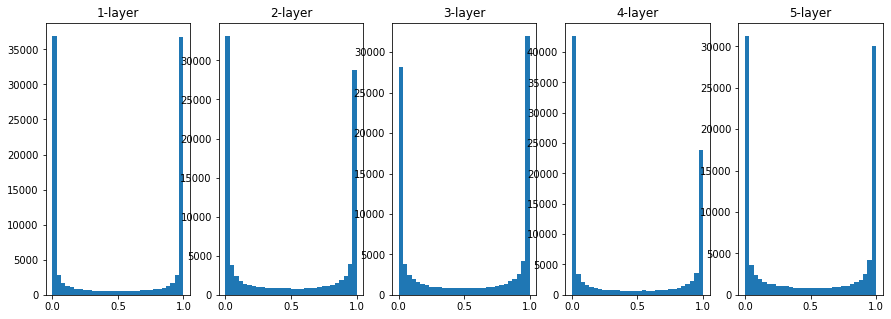

In [8]:
plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),30,range=(0,1))
    
plt.show()

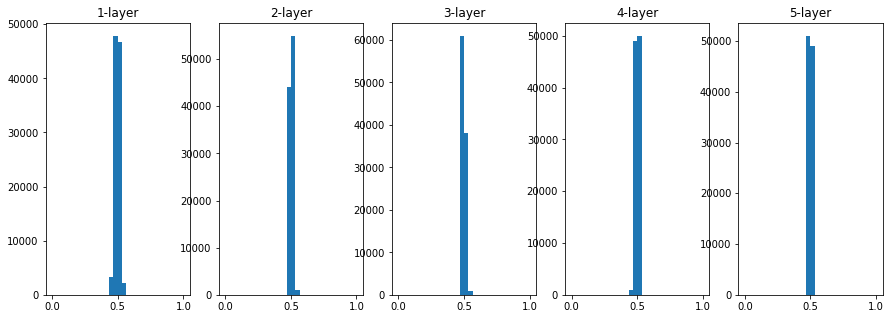

In [9]:
for i in range(hidden_layer_size):
    if i!= 0:
        x = activations[i-1]
    
    #w = np.random.randn(node_num,node_num)*1 바꿈
    w = np.random.randn(node_num,node_num)*0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i]=z
plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),30,range=(0,1))
    
plt.show()  

### Xavier 초깃값

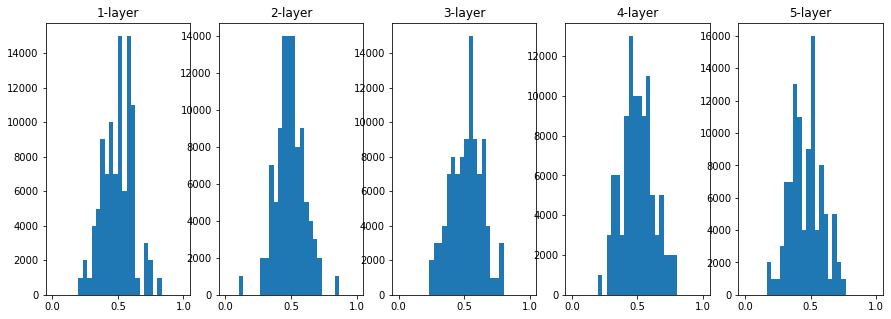

In [10]:
for i in range(hidden_layer_size):
    if i!= 0:
        x = activations[i-1]
    
    #w = np.random.randn(node_num,node_num)*1 바꿈
    #w = np.random.randn(node_num,node_num)*0.01
    w = np.random.randn(node_num,node_num)/np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i]=z
plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),30,range=(0,1))
    
plt.show()  

### 6.4.1 오버피팅

In [28]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from collections import OrderedDict
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx
 
class MultiLayerNet:
    """완전연결 다층 신경망
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        
        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

In [29]:
from dataset.mnist import load_mnist

(x_train, t_train),(x_test,t_test) = load_mnist(normalize = True)
#적은 훈련 데이터 수
x_train = x_train[:300]
t_train = t_train[:300]

In [30]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100,100,100],output_size=10)#7층 네트워크
optimizer = SGD(lr=0.01)#매개변수는 SGD로 갱신

In [31]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

In [33]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch =max(train_size/batch_size,1)
epoch_cnt = 0

In [37]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size



In [44]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch,t_batch)
    optimizer.update(network.params,grads)
    
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

KeyError: <__main__.SGD object at 0x000001F7F9D32760>

## 검증 데이터

In [45]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.
    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

(x_train, t_train),(x_test,t_test) = load_mnist()

#훈련데이터 뒤섞기
x_train, t_train = shuffle_dataset(x_train,t_train)

validaion_rate = 0.2
validation_num = int(x_train.shape[0]*validaion_rate)

x_val = x_train[:validation_num]
t_val = x_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]